In [ ]:
# https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
# https://discuss.pytorch.org/t/will-tensor-to-float32-to-float16-lose-precision-or-values/145264
# https://docs.pytorch.org/docs/stable/nn.functional.html
# https://docs.pytorch.org/docs/stable/generated/torch.Tensor.element_size.html
# https://medium.com/biased-algorithms/guide-to-gradient-clipping-in-pytorch-f1db24ea08a2

 # how things are stored

tensors can be represented in memory as:
- strided --> we see it here
- sparse  --> usefull when the matrix stored has a lot of zeros (ex. image with a lot of white pixels), in that case we store only the location of the non zero values
- ...



In [ ]:
# https://blog.ezyang.com/2019/05/pytorch-internals/

In [1]:
import torch

In [18]:
a = torch.tensor([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
a

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [24]:
# a tensor is stored as a contiguous "string" in the memory
a.stride(), a.shape # in order to pass from one element to another in one row we add 1, to pass from one element to another in columns we have to add 4
# 0 1 2 3 4 5 6 7 8  9 10 11 --> index
# 1,2,3,4,5,6,7,8,9,10,11,12

# to access the element 10 we have to add 1 stride[1] (=1) and 2 stride[0] (=4)
#                 |
#                 V
# 0 1 2 3 4 5 6 7 8  9 10 11 --> index in memory
# 1,2,3,4,5,6,7,8,9,10,11,12 --> added 2 stride 4 we move 8 to the right

# then we add 1 to move to the ninht element
#                    |
#                    V
# 0 1 2 3 4 5 6 7 8  9 10 11 --> index in memory
# 1,2,3,4,5,6,7,8,9,10,11,12

# when we can move using the stride the vector is contigous
# A contiguous tensor means you can walk through memory with its stride() without jumps or gaps.

((4, 1), torch.Size([3, 4]))

In [25]:
# when we change the dimensions of it, we are just changing the STRIDE, that is the "steps" that are between each element row and column based
a_ = a.view(4,3)
a_

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [26]:
a_.stride() #

(3, 1)

In [27]:
print(a.is_contiguous()) # is contiguous tells us if we can access the elements of the tensor like before
print(a.stride())
print(a)

True
(4, 1)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


### slicing

In [51]:
# PyTorch does not copy the data. It makes a view into the same memory as a
b = a[:,0:2] # in this case we are taking of the tensor a only the first 2 elements of each row
b

tensor([[ 1,  2],
        [ 5,  6],
        [ 9, 10]])

In [52]:
print(b.is_contiguous()) # b is no longer contiguous, because it contains "GAPs"
print(b.stride())
# index        0  1  2  3  4  5  6  7  8   9  10  11
# a’s memory:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
# b points to: 1, 2, -, -, 5, 6, -, -, 9, 10, -,   -
#                    ^ gaps (the 3rd and 4th column are skipped from a)

False
(4, 1)


#### PyTorch does not copy the data. It makes a view into the same memory as a


In [57]:
# .storage().data_ptr()--> returns the memory address of the tensor --> It’s the same kind of address you’d see in C/C++ if you did &array[0].
# https://docs.pytorch.org/docs/stable/generated/torch.Tensor.data_ptr.html

# this is because pytorch stores raw numbers in a contiguous memory buffer and slices are views (no copy)

# In normal python instead lists are:
#      a dynamic array of pointers.
#      Each slot holds a reference to a Python object (not the value itself).
#      Example: [1, 2, 3] → the list object has 3 slots → each slot points to a separate Python int object.
#      Slicing a list (a[1:3]) makes a new list with copies of those references. It doesn’t share memory with the original.

In [53]:
b.storage().data_ptr() # as we can see here the address in memory of the first element of b is:

787344576

In [54]:
a.storage().data_ptr() # it is the same as a:

787344576

In [55]:
c = a.clone()

In [56]:
c.storage().data_ptr() # here c is copied, thus the address is different

811525376

# intro

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.cuda.device(0).idx

In [ ]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla V100-PCIE-16GB', major=7, minor=0, total_memory=16144MB, multi_processor_count=80, uuid=3057ab74-6094-1cc7-2607-70f400b9ec7d, pci_bus_id=14, pci_device_id=0, pci_domain_id=0, L2_cache_size=6MB)

In [ ]:
free, total = torch.cuda.mem_get_info(0)
print(f"free {free/1024**3}")
print(f"total {total/1024**3}")

free 15.463134765625
total 15.7657470703125


In [ ]:
free, total = torch.cuda.mem_get_info(0)
print(f"free {free}")
print(f"total {total}")

free 16603414528
total 16928342016


In [ ]:
matrix_a = torch.tensor([[1,2],[4,5],[7,8]], device =device )

In [ ]:
free, total = torch.cuda.mem_get_info(0)
print(f"free {free}")
print(f"total {total}")

free 16601317376
total 16928342016


In [ ]:
matrix_b = torch.tensor([[1,0,1],[1,1,0],[0,1,1]])

In [ ]:
matrix_a.size(), matrix_b.size()

(torch.Size([3, 2]), torch.Size([3, 3]))

In [ ]:
matrix_a @ matrix_b # matrix product not possible

RuntimeError: Expected all tensors to be on the same device, but got mat2 is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA_mm)

In [ ]:
matrix_a.device, matrix_b.device

(device(type='cuda', index=0), device(type='cpu'))

In [ ]:
matrix_b.to(device) # copies and puts in device
matrix_b.device

device(type='cpu')

In [ ]:
matrix_b = matrix_b.to(device) # create a copy on the cuda device
matrix_b.device

device(type='cuda', index=0)

In [ ]:
free, total = torch.cuda.mem_get_info(0)
print(f"free {free}")
print(f"total {total}")

free 16601317376
total 16928342016


In [ ]:
matrix_a @ matrix_b # matrix product not possible because mismatch

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x3)

In [ ]:
transposed_matrix_a = matrix_a.T
transposed_matrix_a.size(), transposed_matrix_a.device

(torch.Size([2, 3]), device(type='cuda', index=0))

In [ ]:
matrix_a[0][0].type(), matrix_b[0][0].type() # this type is not gona work, convert into a float32, 16...

('torch.cuda.LongTensor', 'torch.cuda.LongTensor')

In [ ]:
transposed_matrix_a = torch.tensor([[1,2],[4,5],[7,8]], device =device, dtype=torch.float16 ).T
matrix_b = torch.tensor([[1,0,1],[1,1,0],[0,1,1]], device = device, dtype=torch.float16)

In [ ]:
matrix_product = transposed_matrix_a @ matrix_b
matrix_product

tensor([[ 5., 11.,  8.],
        [ 7., 13., 10.]], device='cuda:0', dtype=torch.float16)

 # memory

In [ ]:
matrix_product.element_size()*8 # bits, element_size() returns bytes, each byte is 8 bit

16

In [ ]:
matrix_product.element_size() # number of bytes

2

In [ ]:
matrix_product.nelement()

6

In [ ]:
matrix_product.element_size()*8*matrix_product.nelement()

96

In [ ]:
int64_matrix = torch.tensor([[ 5, 11,  8],
        [ 7, 13, 10]], device='cuda:0', dtype=torch.int64)

In [ ]:
int64_matrix.element_size() # bytes

8

In [ ]:
int64_matrix.element_size()*8 # bits

64

In [ ]:
matrix_product.nelement()*matrix_product.element_size()*8 # dimension of a 2*3 matrix of float16

96

In [ ]:
int64_matrix.nelement()*int64_matrix.element_size()*8 # dimension of a 2*3 matrix of int64

384

In [ ]:
def get_free_mem():
    free, total = torch.cuda.mem_get_info(0)
    return free

free_before = get_free_mem()

test = torch.tensor([[8., 11., 8.],
                     [7., 13., 10.]],
                    device='cuda:0', dtype=torch.float16)

free_after = get_free_mem()

used_mem = free_before - free_after

tensor_bytes = test.nelement() * test.element_size()

print(f"Free before: {free_before / 1024**2:.2f} MB")
print(f"Free after:  {free_after / 1024**2:.2f} MB")
print(f"Used memory: {used_mem / 1024**2:.6f} MB")
print(f"Tensor size: {tensor_bytes} bytes ({tensor_bytes / 1024**2:.6f} MB)")
print(f"Difference:  {used_mem - tensor_bytes} bytes")
# PyTorch’s CUDA allocator doesn’t necessarily ask the GPU for memory each time you create a small tensor.

Free before: 15744.25 MB
Free after:  15744.25 MB
Used memory: 0.000000 MB
Tensor size: 12 bytes (0.000011 MB)
Difference:  -12 bytes


In [ ]:
def get_free_mem():
    free, total = torch.cuda.mem_get_info(0)
    return free

free_before = get_free_mem()

big = torch.empty((1024, 1024, 1024), device='cuda:0', dtype=torch.float16)  # ~2 GB
free_after = get_free_mem()

used_mem = free_before - free_after

tensor_bytes = big.nelement() * big.element_size()

print(f"Free before: {free_before / 1024**2:.2f} MB")
print(f"Free after:  {free_after / 1024**2:.2f} MB")
print(f"Used memory: {used_mem / 1024**2:.6f} MB")
print(f"Tensor size: {tensor_bytes} bytes ({tensor_bytes / 1024**2:.6f} MB)")
print(f"Difference:  {used_mem - tensor_bytes} bytes")
# PyTorch’s CUDA allocator doesn’t necessarily ask the GPU for memory each time you create a small tensor.
# When you run your code, PyTorch already has a pre-allocated memory pool on the GPU

Free before: 15744.25 MB
Free after:  13696.25 MB
Used memory: 2048.000000 MB
Tensor size: 2147483648 bytes (2048.000000 MB)
Difference:  0 bytes


In [ ]:
del big # PyTorch keeps the freed block in its internal pool for reuse


In [ ]:
torch.cuda.empty_cache() # tells PyTorch to release unused memory from its caching allocator back to the CUDA driver


In [ ]:
import gc
import torch

objs = [obj for obj in gc.get_objects()
        if torch.is_tensor(obj) and obj.is_cuda]

for o in objs:
    print(type(o), o.size(), o.dtype, o.device, "| bits: ", o.element_size() * o.nelement()*8,"| bytes: ", o.element_size() * o.nelement())


<class 'torch.Tensor'> torch.Size([2, 3]) torch.float16 cuda:0 | bits:  96 | bytes:  12
<class 'torch.Tensor'> torch.Size([3, 2]) torch.float16 cuda:0 | bits:  96 | bytes:  12
<class 'torch.Tensor'> torch.Size([2, 3]) torch.float16 cuda:0 | bits:  96 | bytes:  12
<class 'torch.Tensor'> torch.Size([3, 3]) torch.float16 cuda:0 | bits:  144 | bytes:  18
<class 'torch.Tensor'> torch.Size([2, 3]) torch.float16 cuda:0 | bits:  96 | bytes:  12
<class 'torch.Tensor'> torch.Size([2, 3]) torch.float16 cuda:0 | bits:  96 | bytes:  12
<class 'torch.Tensor'> torch.Size([2, 3]) torch.int64 cuda:0 | bits:  384 | bytes:  48
<class 'torch.Tensor'> torch.Size([3, 2]) torch.int64 cuda:0 | bits:  384 | bytes:  48


/venv/main/lib/python3.12/site-packages/torch/__init__.py:1124: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  return isinstance(obj, torch.Tensor)


In [ ]:
torch.cuda.memory_allocated(0) #counts all bytes that PyTorch has marked as in use for tensors on the GPU.

8523264

In [ ]:
allocated_memory = torch.cuda.memory_allocated(0)
dimensions = []
for o in objs:
    dim = o.element_size() * o.nelement()*8
    dimensions.append(dim)
sum(dimensions) #only covers tensors that Python’s garbage collector can still see.

1392

In [ ]:
allocated_memory-sum(dimensions) #some PyTorch ops allocate small auxiliary buffers that aren’t exposed as normal tensors

8523090

# another way for matrix mult

In [ ]:
import torch.nn as nn

In [ ]:
linear = nn.Linear(in_features = 3, out_features=4).requires_grad_(False) # W: (4, 3), b: (4,)

In [ ]:
linear.weight.size(),linear.bias.size()

(torch.Size([4, 3]), torch.Size([4]))

In [ ]:
# when we make train or make inference, we like to do it in batches, example, a batch of 2 elements, each with 3 features;
batches = torch.tensor([[1,2,3],[4,5,6]], dtype = torch.float32)

In [ ]:
linear(batches) # this is equivalent to the operation below

tensor([[-0.0798, -2.1700, -0.8030,  1.0265],
        [ 0.3012, -3.9053, -0.2681,  2.7252]])

In [ ]:
batches @ linear.weight.T + linear.bias

tensor([[-0.0798, -2.1700, -0.8030,  1.0265],
        [ 0.3012, -3.9053, -0.2681,  2.7252]])

In [ ]:
linear_without_bias = nn.Linear(in_features = 3, out_features=4, bias=False).requires_grad_(False) # W: (4, 3), b: (4,)
linear_without_bias.bias

# add non linearity

In [ ]:
batches = torch.tensor([[1,2,3],[4,5,6]], dtype = torch.float32)

In [ ]:
linear = nn.Linear(in_features = 3, out_features=4).requires_grad_(False) # W: (4, 3), b: (4,)
relu = nn.ReLU()

In [ ]:
linear_result = linear(batches)
non_linear = relu(linear_result)
non_linear

tensor([[0.6065, 0.1318, 0.6267, 0.9680],
        [1.1041, 0.0000, 2.0782, 1.7376]])

# import data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("sample_data/mnist_train_small.csv", header=None)

In [ ]:
dataset, dataset_test = train_test_split(data, test_size=0.05)

In [ ]:
dataset.shape,dataset_test.shape

((19000, 785), (1000, 785))

In [ ]:
dataset.reset_index(inplace = True, drop = True), dataset_test.reset_index(inplace = True,drop = True)

(None, None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.iloc[0] # index lock the first row

0      2
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 785, dtype: int64

In [ ]:
Y_train, X_train = dataset.iloc[:,0], dataset.iloc[:, 1:] # get all the rows of the zeroth column, and all the rows from the first column on

In [ ]:
X_train.iloc[0,:] # let's see one example

1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 784, dtype: int64

In [ ]:
example = torch.tensor(X_train.iloc[0,:].to_numpy())

In [ ]:
reshaped_example = example.view([28,28]) # view is very usefull to reshape tensors

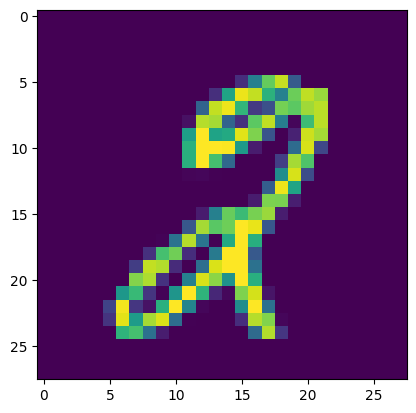

In [ ]:
plt.imshow(reshaped_example)

# the PyTorch way

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [ ]:
Y_train, X_train = torch.tensor(dataset.iloc[:,0].to_numpy()).to(device), torch.tensor(dataset.iloc[:, 1:].to_numpy(),dtype = torch.float32).to(device)
Y_test, X_test = torch.tensor(dataset_test.iloc[:,0].to_numpy()).to(device), torch.tensor(dataset_test.iloc[:, 1:].to_numpy(),dtype = torch.float32).to(device)

In [ ]:
Y_train_one_hot = F.one_hot(Y_train, 10).to(torch.float16)
Y_test_one_hot = F.one_hot(Y_test, 10).to(torch.float16)
Y_train_one_hot[0]

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       dtype=torch.float16)

In [ ]:
train_loader = DataLoader(TensorDataset(X_train, Y_train_one_hot), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, Y_test_one_hot), batch_size=128, shuffle=True)

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], device='cuda:0',
       dtype=torch.float16)

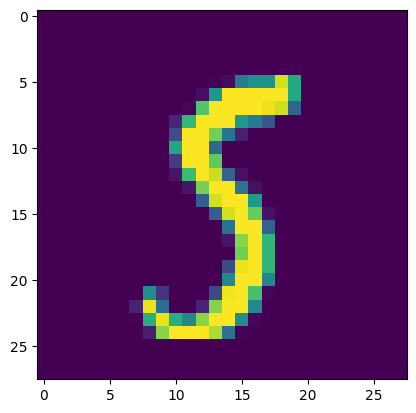

In [ ]:
input,target = next(iter(train_loader))
plt.imshow(input[0].view(28,28).to("cpu"))
target[0]

# Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.fc1 = nn.Linear(28**2, 28**2*4)
        self.fc2 = nn.Linear(28**2*4, 28**2*4)
        self.fc3 = nn.Linear(28**2*4, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        logits = self.fc3(x)
        return logits

In [ ]:
model = MLP()

In [ ]:
[p.shape for p in model.parameters()] # weight, bias, weight, bias...

[torch.Size([3136, 784]),
 torch.Size([3136]),
 torch.Size([3136, 3136]),
 torch.Size([3136]),
 torch.Size([10, 3136]),
 torch.Size([10])]

In [ ]:
[p.device for p in model.parameters()]



[device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu')]

In [ ]:
model.to(device)
[p.device for p in model.parameters()] # all in cuda device

[device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0)]

In [ ]:
[p.requires_grad for p in model.parameters()] # all requires grad True

[True, True, True, True, True, True]

In [ ]:
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=3136, bias=True)
  (fc2): Linear(in_features=3136, out_features=3136, bias=True)
  (fc3): Linear(in_features=3136, out_features=10, bias=True)
)


## pay attention to dimensions

In [ ]:
# make predictions and check confidence of the model
input,target = next(iter(train_loader))
output, target = model(input[0:2]), target[0:2]
# confidence is low, infact the model gives random gibberish as for the results
output

tensor([[  8.3907,  -1.2295,  -3.8537,   0.4912,  -6.8871,  14.2614,   4.5075,
          -1.2563,  -8.1720,   0.5121],
        [ 12.5485,   2.7318,  -8.6343,  -2.2864,  -6.2382,  14.8845,  -0.8464,
          -3.7702, -11.4012,  -2.9013]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
output.size()

torch.Size([2, 10])

In [ ]:
output[0].softmax(-1) # we want to calculate softmax along each element in the batch, so we want to do it on
           # the second of the 2 dimensions above, not the first
           #        NOT THIS ONE
           #          |
           #          V
           # [
               # [ -4.0369,  -4.3247, -10.1753,   0.1598,  -2.9019,   4.0838,   7.7013, 2.9484, -12.1731,  -3.8176] <-- along this dimension
               # [ -5.4059, -11.0881, -21.5375,  -6.6593,   1.3501,  -1.0939,   3.1066, -1.9324,  -1.4153,  -7.6667]
            #]


tensor([2.8126e-03, 1.8669e-07, 1.3534e-08, 1.0433e-06, 6.5169e-10, 9.9713e-01,
        5.7898e-05, 1.8175e-07, 1.8032e-10, 1.0653e-06], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
output.softmax(dim = 0) # this is wrong, we are calcualting across elements in the batches!

tensor([[0.0154, 0.0187, 0.9917, 0.9415, 0.3432, 0.3491, 0.9953, 0.9251, 0.9619,
         0.9681],
        [0.9846, 0.9813, 0.0083, 0.0585, 0.6568, 0.6509, 0.0047, 0.0749, 0.0381,
         0.0319]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
output.softmax(dim = -1) # as we can see this is the same as the result we obtained 2 cells above, thus it is the correct one

tensor([[2.8126e-03, 1.8669e-07, 1.3534e-08, 1.0433e-06, 6.5169e-10, 9.9713e-01,
         5.7898e-05, 1.8175e-07, 1.8032e-10, 1.0653e-06],
        [8.8187e-02, 4.8090e-06, 5.5696e-11, 3.1819e-08, 6.1153e-10, 9.1181e-01,
         1.3430e-07, 7.2154e-09, 3.5006e-12, 1.7204e-08]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
output.softmax(dim = 1) # when we have multple elements in each batch, we can just indicate the dimension,
# if there is only one element, just use -1

tensor([[2.8126e-03, 1.8669e-07, 1.3534e-08, 1.0433e-06, 6.5169e-10, 9.9713e-01,
         5.7898e-05, 1.8175e-07, 1.8032e-10, 1.0653e-06],
        [8.8187e-02, 4.8090e-06, 5.5696e-11, 3.1819e-08, 6.1153e-10, 9.1181e-01,
         1.3430e-07, 7.2154e-09, 3.5006e-12, 1.7204e-08]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

# model confidence

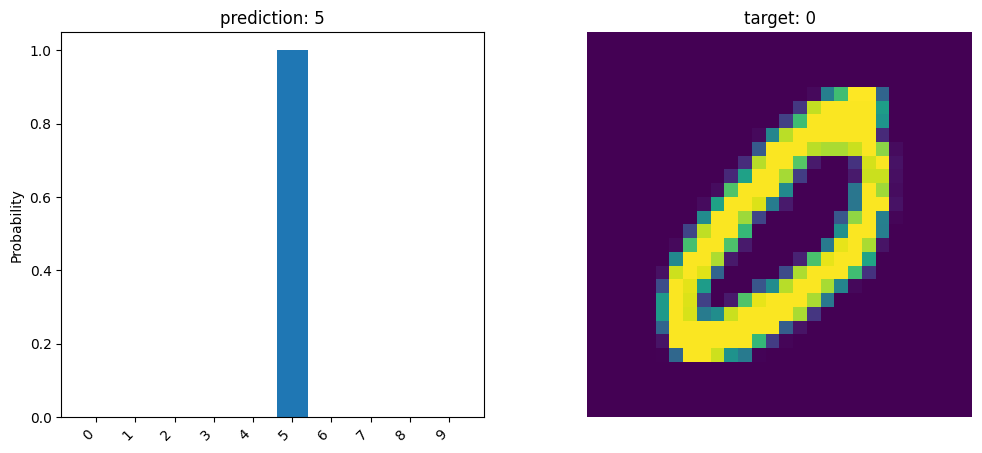

In [ ]:
# make predictions and check confidence of the model
input,target = next(iter(train_loader))
output, target = model(input[0]), target[0]
# confidence is low, infact the model gives random gibberish as for the results
output= output.softmax(dim = -1)
vals = output.detach().cpu().numpy()


fig,ax = plt.subplots(1,2, figsize =( 12,5))

ax[0].bar(range(len(vals)), vals)
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(10), rotation=45, ha='right')
ax[0].set_ylabel("Probability")
ax[0].set_title(f"prediction: {torch.argmax(output, dim = -1)}")
ax[1].imshow(input[0].view(28,28).to("cpu"))
ax[1].set_title(f"target: {torch.argmax(target, dim=-1)}")
ax[1].set_axis_off()
plt.show()

In [ ]:
input,target = next(iter(train_loader))

In [ ]:
output = model(input[0])

In [ ]:
output.size()

torch.Size([10])

In [ ]:
output = output.view(1,10)
output.size(),output.softmax(dim = 1)

(torch.Size([1, 10]),
 tensor([[7.6511e-06, 2.7651e-05, 1.4027e-08, 1.1176e-04, 4.3453e-04, 8.3157e-01,
          1.9189e-05, 7.1974e-03, 1.2965e-04, 1.6050e-01]], device='cuda:0',
        grad_fn=<SoftmaxBackward0>))

In [ ]:
sum(output.softmax(dim = 1)[0]) # output is softmax

tensor(1.0000, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
output_batch = model(input) # we can give the model entire batches, to train or to infer

In [ ]:
output_batch

tensor([[ -3.0352,  -1.7504,  -9.3369,  ...,   3.8114,  -0.2053,   6.9160],
        [  7.0940,  -5.7124, -24.8535,  ...,  -6.7449,   5.2446,  18.1372],
        [ -4.5684,  -2.0430, -25.9941,  ...,  -5.7504,  -3.8089,  12.0390],
        ...,
        [ -0.0334,  -2.5434, -14.5901,  ...,   4.6259,  -2.0886,   1.2165],
        [ 10.4033,  -9.8042, -20.8092,  ...,  -1.7700,  -5.8970,   9.1409],
        [ -4.0619,   0.0690,  -7.8383,  ...,   5.2754,  -7.8193,  13.7061]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
output_batch.size()

torch.Size([128, 10])

# train the model

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
output = model(input)
loss = criterion(output,target)
float(loss.detach())

15.548409461975098

In [ ]:
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-30, weight_decay= 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay= 1)

In [ ]:
max_norm = 1.0  # Define a threshold
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

tensor(0.)

In [ ]:
loss_s_train = []
loss_s_test = []
test = True

In [ ]:
print(float(loss))
for _ in range(10):
  optimizer.zero_grad()
  input,target = next(iter(train_loader))

  output = model(input)

  loss = criterion(output,target)

  loss.backward()
  optimizer.step()
  print(float(loss.detach()))
  if test:
    input_test,target_test = next(iter(test_loader))
    output_test = model(input_test)
    loss_test = criterion(output_test, target_test)
    loss_s_test.append(float(loss_test.detach()))
  loss_s_train.append(float(loss.detach()))


1.6581058502197266
0.7946987152099609
0.9653741121292114
0.9255204796791077
0.7267638444900513
1.047593593597412
1.0068778991699219
0.7782911062240601
1.1166462898254395
0.6532676219940186
0.8123645186424255


Text(0.5, 1.0, 'test loss')

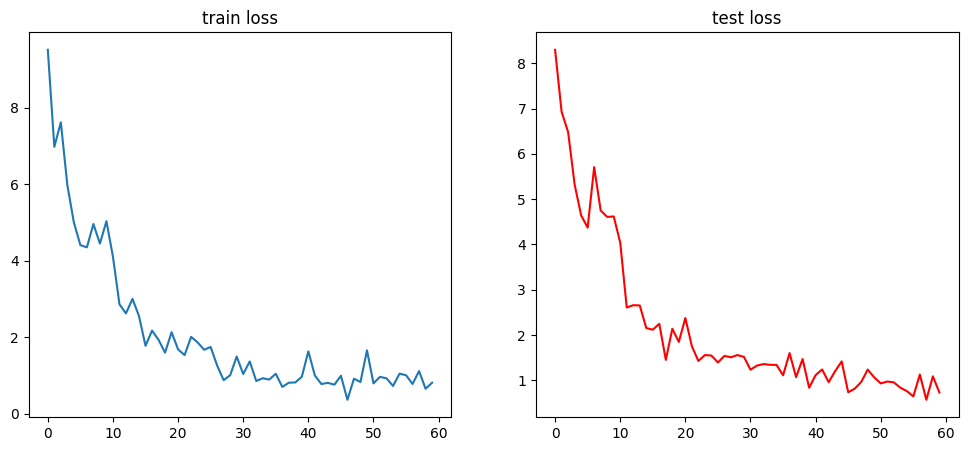

In [ ]:
fig,ax = plt.subplots(1,2, figsize =( 12,5))

ax[0].plot(loss_s_train)
ax[0].set_title("train loss")

ax[1].plot(loss_s_test, color = "red")
ax[1].set_title("test loss")


# try on the train set

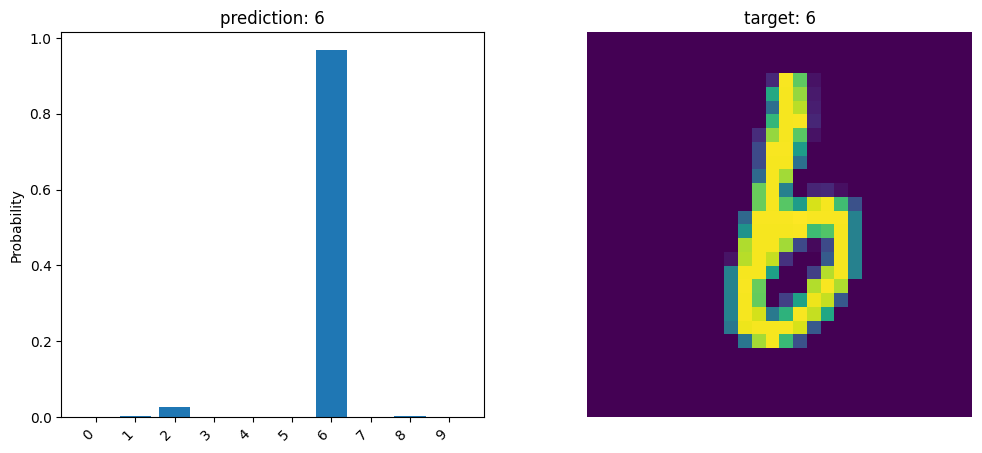

In [ ]:
input,target = next(iter(train_loader))

input_example = input[0]
target_example = target[0]
train_example_output, train_example_target = model(input_example),target_example


train_example_output = train_example_output.softmax(dim = -1)
vals = train_example_output.detach().cpu().numpy()

fig,ax = plt.subplots(1,2, figsize =( 12,5))

ax[0].bar(range(len(vals)), vals)
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(10), rotation=45, ha='right')
ax[0].set_ylabel("Probability")
ax[0].set_title(f"prediction: {torch.argmax(train_example_output, dim = -1)}")
ax[1].imshow(input[0].view(28,28).to("cpu"))
ax[1].set_title(f"target: {torch.argmax(target_example, dim=-1)}")
ax[1].set_axis_off()
plt.show()

# try on the test set

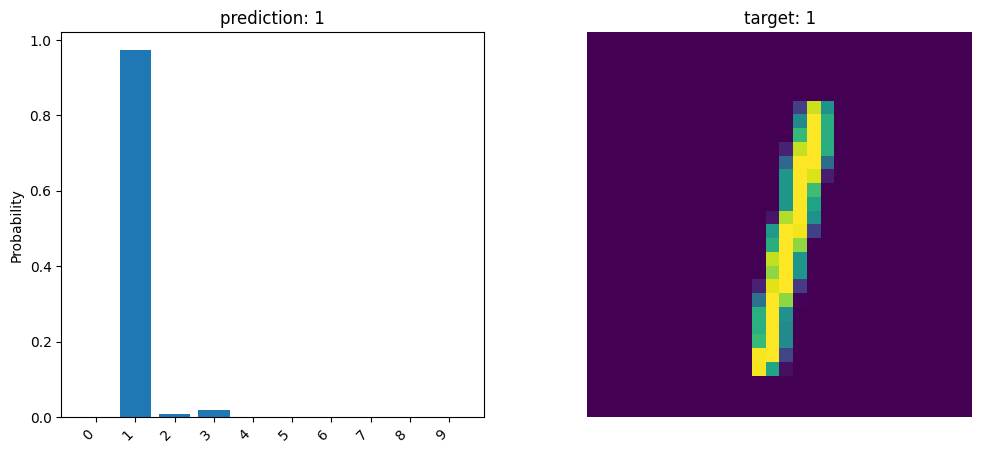

In [ ]:
input,target = next(iter(test_loader))

input_example = input[0]
target_example = target[0]
test_example_output, test_example_target = model(input_example),target_example


test_example_output = test_example_output.softmax(dim = -1)
vals = test_example_output.detach().cpu().numpy()

fig,ax = plt.subplots(1,2, figsize =( 12,5))

ax[0].bar(range(len(vals)), vals)
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(10), rotation=45, ha='right')
ax[0].set_ylabel("Probability")
ax[0].set_title(f"prediction: {torch.argmax(test_example_output, dim = -1)}")
ax[1].imshow(input[0].view(28,28).to("cpu"))
ax[1].set_title(f"target: {torch.argmax(target_example, dim=-1)}")
ax[1].set_axis_off()
plt.show()